<a href="https://colab.research.google.com/github/CodeHunterOfficial/A_PythonLibraries/blob/main/%D0%9D%D0%B0%D1%85%D0%BE%D0%B6%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%BE%D1%80%D0%BD%D0%B5%D0%B9_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_NPV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Формулы для старого и нового методов:

#### 1. **Формула для старого метода (`IrrFunc_Old`)**:
Функция `IrrFunc_Old` вычисляет NPV (чистую приведенную стоимость) по следующей формуле:

$$
\text{NPV}(irr) = -sum + \sum_{k=1}^{n} \frac{CF_k}{(1 + irr)^{t_k}}
$$

Где:
- $sum$ — начальная сумма (например, сумма кредита).
- $CF_k$ — денежный поток на дату $k$ (например, платеж по графику).
- $t_k$ — время (в годах) от начальной даты до даты $k$.
- $irr$ — внутренняя норма доходности, которую нужно найти.

#### 2. **Формула для нового метода (`IrrFunc_New`)**:
Функция `IrrFunc_New` использует более сложную формулу, которая учитывает дополнительные параметры, такие как `BasePeriodLength`, `EkValue`, и `BasePeriodCount`:

$$
\text{NPV}(irr) = -sum + \sum_{k=1}^{n} \frac{CF_k}{(1 + irr \cdot ek) \cdot (1 + irr)^{qk}}
$$

Где:
- $sum$ — начальная сумма.
- $CF_k$ — денежный поток на дату $k$.
- $ek$ — коэффициент, зависящий от остатка дней после деления на базовый период (`BasePeriodLength`).
- $qk$ — количество полных базовых периодов до даты $k$.
- $irr$ — внутренняя норма доходности.



Давайте найдем производную функции NPV по переменной $irr$. Напомним, что функция NPV задана следующим образом:

$$
\text{NPV}(irr) = -\text{sum} + \sum_{k=1}^{n} \frac{CF_k}{(1 + irr \cdot ek) \cdot (1 + irr)^{qk}}
$$

### Шаг 1: Запись функции

Функция NPV может быть записана как:

$$
\text{NPV}(irr) = -\text{sum} + \sum_{k=1}^{n} \frac{CF_k}{(1 + irr \cdot ek) \cdot (1 + irr)^{qk}}
$$

### Шаг 2: Применение правила производной

Чтобы найти производную, мы будем использовать правило производной для дроби. Если у нас есть функция вида:

$$
f(x) = \frac{g(x)}{h(x)}
$$

то производная этой функции будет:

$$
f'(x) = \frac{g'(x)h(x) - g(x)h'(x)}{(h(x))^2}
$$

В нашем случае:

- $g(irr) = CF_k$
- $h(irr) = (1 + irr \cdot ek) \cdot (1 + irr)^{qk}$

### Шаг 3: Нахождение производной

Теперь найдем производную NPV по $irr$:

$$
\frac{d(\text{NPV})}{d(irr)} = \sum_{k=1}^{n} \frac{d}{d(irr)} \left( \frac{CF_k}{(1 + irr \cdot ek) \cdot (1 + irr)^{qk}} \right)
$$

Используя правило производной для дроби, получаем:

$$
\frac{d}{d(irr)} \left( \frac{CF_k}{(1 + irr \cdot ek) \cdot (1 + irr)^{qk}} \right) = \frac{0 \cdot h(irr) - CF_k \cdot h'(irr)}{(h(irr))^2}
$$

Где $h(irr) = (1 + irr \cdot ek) \cdot (1 + irr)^{qk}$.

### Шаг 4: Нахождение производной $h(irr)$

Теперь найдем производную $h(irr)$:

$$
h(irr) = (1 + irr \cdot ek) \cdot (1 + irr)^{qk}
$$

Используя правило произведения, получаем:

$$
h'(irr) = (ek) \cdot (1 + irr)^{qk} + (1 + irr \cdot ek) \cdot (qk) \cdot (1 + irr)^{qk - 1}
$$

### Шаг 5: Подстановка в производную NPV

Теперь подставим $h'(irr)$ в производную NPV:

$$
\frac{d(\text{NPV})}{d(irr)} = -\sum_{k=1}^{n} \frac{CF_k \cdot h'(irr)}{((1 + irr \cdot ek) \cdot (1 + irr)^{qk})^2}
$$

### Итоговая производная

Таким образом, производная функции NPV по $irr$ будет:

$$
\frac{d(\text{NPV})}{d(irr)} = -\sum_{k=1}^{n} \frac{CF_k \cdot \left(ek \cdot (1 + irr)^{qk} + (1 + irr \cdot ek) \cdot qk \cdot (1 + irr)^{qk - 1}\right)}{((1 + irr \cdot ek) \cdot (1 + irr)^{qk})^2}
$$

Эта производная показывает, как изменяется NPV в зависимости от изменения IRR.


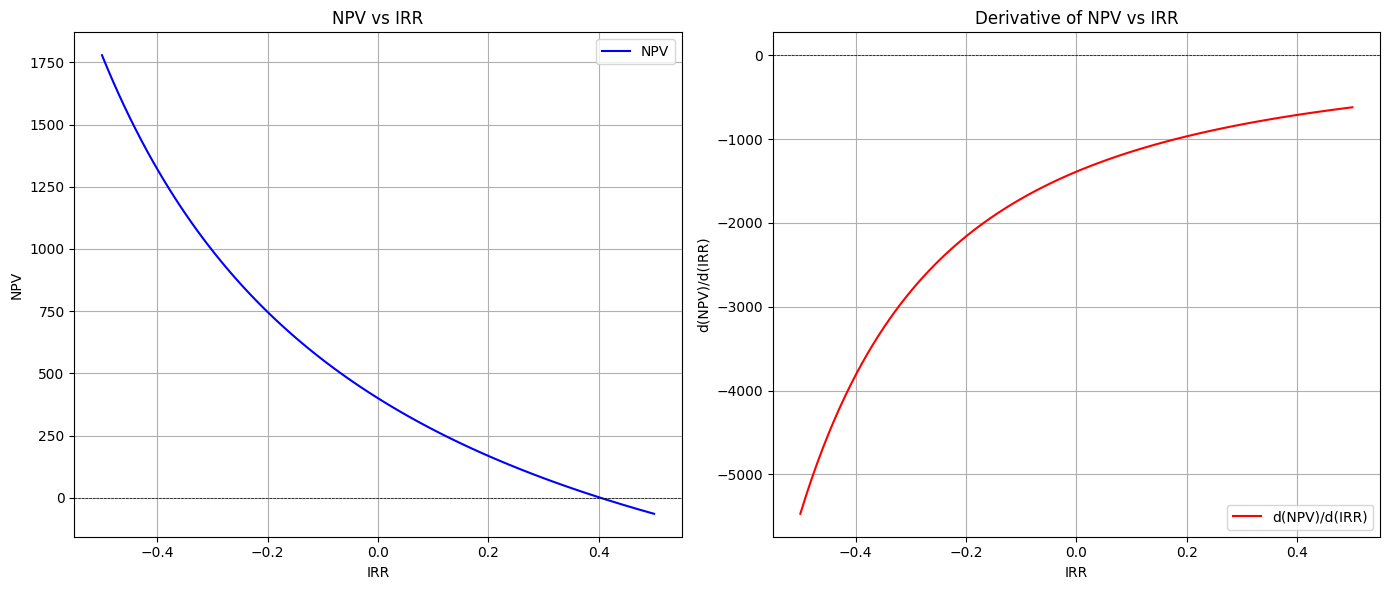

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем параметры
initial_sum = 1000  # начальная сумма
CF = np.array([200, 300, 400, 500])  # денежные потоки
BasePeriodLength = 365  # базовый период в днях
n = len(CF)  # количество периодов

# Функция для расчета коэффициента ek
def calculate_ek(k):
    return (BasePeriodLength - (k % BasePeriodLength)) / BasePeriodLength

# Функция для расчета NPV
def npv(irr):
    sum_npv = -initial_sum
    for k in range(1, n + 1):
        ek = calculate_ek(k)
        qk = (k - 1) // BasePeriodLength  # количество полных базовых периодов
        sum_npv += CF[k - 1] / ((1 + irr * ek) * (1 + irr) ** qk)
    return sum_npv

# Функция для расчета производной NPV по IRR
def npv_derivative(irr):
    derivative = 0
    for k in range(1, n + 1):
        ek = calculate_ek(k)
        qk = (k - 1) // BasePeriodLength
        denominator = ((1 + irr * ek) * (1 + irr) ** qk) ** 2
        term1 = ek * (1 + irr) ** qk
        term2 = (1 + irr * ek) * qk * (1 + irr) ** (qk - 1)
        derivative -= CF[k - 1] * (term1 + term2) / denominator
    return derivative

# Генерируем значения IRR для визуализации
irr_values = np.linspace(-0.5, 0.5, 100)
npv_values = np.array([npv(irr) for irr in irr_values])
npv_derivative_values = np.array([npv_derivative(irr) for irr in irr_values])

# Визуализация
plt.figure(figsize=(14, 6))

# График NPV
plt.subplot(1, 2, 1)
plt.plot(irr_values, npv_values, label='NPV', color='blue')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title('NPV vs IRR')
plt.xlabel('IRR')
plt.ylabel('NPV')
plt.grid()
plt.legend()

# График производной NPV
plt.subplot(1, 2, 2)
plt.plot(irr_values, npv_derivative_values, label='d(NPV)/d(IRR)', color='red')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title('Derivative of NPV vs IRR')
plt.xlabel('IRR')
plt.ylabel('d(NPV)/d(IRR)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### Условия существования и отсутствия решения для уравнения NPV(irr) = 0

#### 1. **Денежные потоки ($CF_k$):**
Для того чтобы уравнение NPV(irr) = 0 имело решение, денежные потоки должны удовлетворять определенным условиям:
- **Разные знаки денежных потоков:** Если все денежные потоки $CF_k$ имеют одинаковый знак (все положительные или все отрицательные), то функция NPV(irr) будет монотонной и не пересечет ось $irr$. Это означает, что решение может отсутствовать.
  - Если все $CF_k > 0$, то NPV(irr) всегда будет положительным при любом $irr$, и уравнение NPV(irr) = 0 не будет иметь решения.
  - Если все $CF_k < 0$, то NPV(irr) всегда будет отрицательным, и решение также отсутствует.
- **Наличие как положительных, так и отрицательных потоков:** Для существования решения необходимо, чтобы денежные потоки содержали как положительные, так и отрицательные значения. Это создает возможность изменения знака функции NPV(irr), что увеличивает вероятность существования корня уравнения.
- **Суммарная рентабельность:** Если сумма всех денежных потоков (без учета дисконтирования) меньше начальной суммы $sum$, это может указывать на отсутствие рентабельности проекта. В таком случае даже при наличии разных знаков потоков решение может отсутствовать, так как проект не сможет покрыть начальные затраты.

**Вывод:** Для существования решения денежные потоки должны содержать как положительные, так и отрицательные значения, а их суммарная дисконтированная величина должна быть достаточной для компенсации начальной суммы $sum$.



#### 2. **Начальная сумма ($sum$):**
Начальная сумма $sum$ играет ключевую роль в определении существования решения:
- Если $sum = 0$, то уравнение NPV(irr) = 0 может иметь тривиальное решение (например, если все $CF_k = 0$). Однако в реальных проектах начальная сумма обычно ненулевая, и именно она создает необходимость в расчете IRR.
- Если $sum \neq 0$, то начальная сумма должна быть компенсирована будущими денежными потоками. Если суммарная дисконтированная величина потоков недостаточна для покрытия $sum$, решение может отсутствовать.

**Вывод:** Начальная сумма $sum$ должна быть ненулевой и должна быть компенсирована будущими денежными потоками для обеспечения существования нетривиального решения.


#### 3. **Коэффициенты $ek$ и $qk$:**
Коэффициенты $ek$ и $qk$ зависят от структуры временных интервалов и способа дисконтирования. Их влияние на существование решения:
- Эти коэффициенты должны быть корректно определены, чтобы избежать математических ошибок, таких как деление на ноль или неопределенности в расчетах.
- Если коэффициенты приводят к разрывам или неопределенностям в функции NPV(irr), это может затруднить нахождение решения.

**Вывод:** Коэффициенты $ek$ и $qk$ должны быть правильно определены и не должны приводить к математическим аномалиям, которые делают невозможным нахождение решения.


#### 4. **Сложность функции NPV(irr):**
Функция NPV(irr) может быть нелинейной и сложной для анализа:
- **Нелинейность:** Если денежные потоки меняют знак несколько раз, функция NPV(irr) может иметь несколько корней (несколько значений IRR). Это усложняет анализ и требует дополнительных проверок.
- **Численные методы:** Для нахождения IRR часто используются численные методы, такие как метод Ньютона или метод бисекции. Однако эти методы могут не сходиться, если функция имеет разрывы, осцилляции или слишком сложную структуру.
- **Особенности функции:** Если функция NPV(irr) содержит разрывы или другие особенности, это может сделать невозможным применение численных методов для нахождения решения.

**Вывод:** Сложность функции NPV(irr) может затруднить нахождение решения, но не исключает его существование. Однако в случаях, когда функция имеет разрывы или осцилляции, решение может отсутствовать.



#### 5. **Итоговые условия отсутствия решения:**
Уравнение NPV(irr) = 0 не имеет решения в следующих случаях:
1. **Все денежные потоки имеют одинаковый знак:** Если все $CF_k$ положительные или все отрицательные, функция NPV(irr) не пересекает ось $irr$, и решение отсутствует.
2. **Тривиальный случай:** Если начальная сумма $sum = 0$ и все $CF_k = 0$, то уравнение имеет бесконечно много решений, что является тривиальным случаем.
3. **Недостаточная рентабельность:** Если суммарная дисконтированная величина денежных потоков меньше начальной суммы $sum$, это указывает на отсутствие рентабельности проекта, и решение может отсутствовать.
4. **Особенности функции NPV(irr):** Если функция содержит разрывы, осцилляции или другие особенности, которые делают невозможным применение численных методов, решение может отсутствовать.



#### 6. **Дополнительные рекомендации:**
- **Использование MIRR:** В случаях, когда IRR не существует или имеет несколько значений, рекомендуется использовать модифицированную внутреннюю норму доходности (MIRR), которая устраняет некоторые недостатки IRR.
- **Анализ NPV при заданной ставке дисконтирования:** Если расчет IRR затруднен, можно анализировать NPV при заданной ставке дисконтирования, чтобы оценить рентабельность проекта.
- **Проверка чувствительности:** Для сложных проектов рекомендуется проводить анализ чувствительности, чтобы оценить влияние изменений ключевых параметров (например, денежных потоков или ставки дисконтирования) на NPV и IRR.



### Заключение:
Условия существования и отсутствия решения для уравнения NPV(irr) = 0 зависят от структуры денежных потоков, начальной суммы, корректности коэффициентов и сложности функции NPV(irr). Основная причина отсутствия решения — невозможность компенсации начальной суммы через будущие денежные потоки или особенности функции, которые делают невозможным применение численных методов. В таких случаях рекомендуется использовать альтернативные методы анализа, такие как MIRR или анализ NPV при заданной ставке дисконтирования.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для расчета коэффициента ek
def calculate_ek(k):
    return (BasePeriodLength - (k % BasePeriodLength)) / BasePeriodLength

# Функция для расчета NPV
def npv(irr):
    sum_npv = -initial_sum
    for k in range(1, n + 1):
        ek = calculate_ek(k)
        qk = (k - 1) // BasePeriodLength  # количество полных базовых периодов
        sum_npv += CF[k - 1] / ((1 + irr * ek) * (1 + irr) ** qk)
    return sum_npv

# Функция для нахождения всех интервалов, где существует решение
def find_root_intervals(func, start, end, step):
    intervals = []
    prev_value = func(start)
    for irr in np.arange(start, end, step):
        current_value = func(irr)
        if prev_value * current_value < 0:  # Если функция меняет знак
            intervals.append((irr - step, irr))  # Добавляем интервал
        prev_value = current_value
    return intervals  # Возвращаем все интервалы

# Функция для нахождения корня методом бисекции
def bisection_method(func, a, b, tol=1e-6):
    if func(a) * func(b) >= 0:
        raise ValueError("Функция должна менять знак на интервале [a, b]")

    while (b - a) / 2.0 > tol:
        midpoint = (a + b) / 2.0
        if func(midpoint) == 0:
            return midpoint  # Найден точный корень
        elif func(a) * func(midpoint) < 0:
            b = midpoint  # Корень находится в левой половине
        else:
            a = midpoint  # Корень находится в правой половине
    return (a + b) / 2.0  # Возвращаем приближенное значение корня

# Функция для нахождения всех корней на основе найденных интервалов
def find_all_roots(func, intervals):
    roots = []
    for a, b in intervals:
        try:
            root = bisection_method(func, a, b)
            roots.append(root)
        except ValueError:
            continue  # Игнорируем интервалы, где нет корня
    return roots

Найденные интервалы: [(0.18, 0.19)]
Найденные корни: [0.1818084716796875]
Интервал, в котором существует решение: (0.18, 0.19)
Найденный корень (IRR): 0.1818084716796875


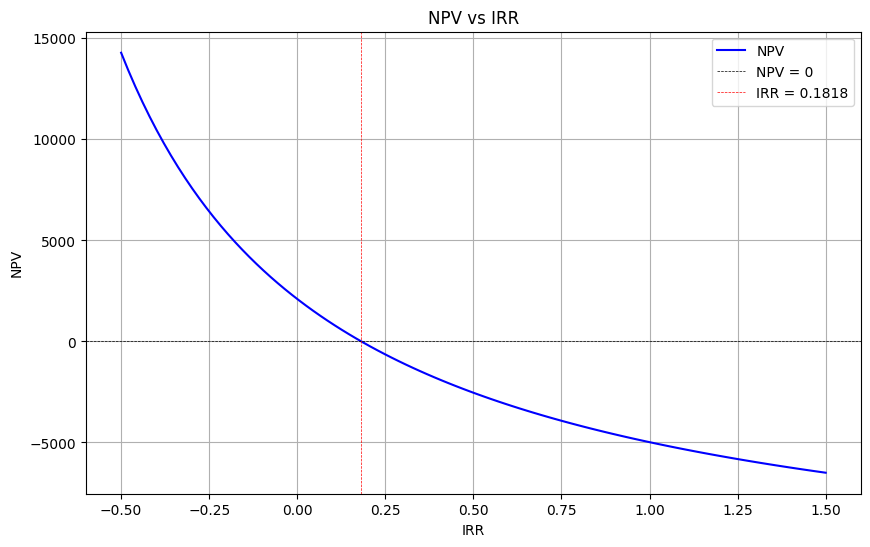

Сумма денежных потоков: 15000


In [3]:
# Определяем параметры
initial_sum =12900  # начальная сумма
CF = [
    1000, 3000, 4000, 7000
]
BasePeriodLength = 30  # базовый период в днях
n = len(CF)  # количество периодов

# Задаем диапазон и шаг
start_irr = 0
end_irr =100
step = 0.01


 # Находим интервалы
intervals = find_root_intervals(npv, start_irr, end_irr, step)

# Находим все корни
roots = find_all_roots(npv, intervals)

print("Найденные интервалы:", intervals)
print("Найденные корни:", roots)

if intervals:
    for interval in intervals:
        print(f"Интервал, в котором существует решение: {interval}")
        # Применяем метод бисекции для нахождения корня
        root = bisection_method(npv, interval[0], interval[1])
        print(f"Найденный корень (IRR): {root}")
else:
    print("Интервал не найден. Попробуйте расширить диапазон поиска или уменьшить шаг.")

# Генерируем значения IRR для визуализации
irr_values = np.linspace(-0.5, 1.5, 100)
npv_values = np.array([npv(irr) for irr in irr_values])

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(irr_values, npv_values, label='NPV', color='blue')
plt.axhline(0, color='black', lw=0.5, ls='--', label='NPV = 0')  # Горизонтальная линия NPV = 0

# Если корень найден, добавляем вертикальную линию для IRR
if interval:
    plt.axvline(root, color='red', lw=0.5, ls='--', label=f'IRR = {root:.4f}')

plt.title('NPV vs IRR')
plt.xlabel('IRR')
plt.ylabel('NPV')
plt.grid()
plt.legend()
plt.show()

# Сумма денежных потоков
SumSF = 0
for item in CF:
    SumSF += item

print(f"Сумма денежных потоков: {SumSF}")

**Например, если рассмотреть счет с номером 1422 413, сумма кредита составляет 100 000,00 рублей, а сумма денежного потока (всего) равна 98 098,71 рублей. По счету с номером 342/11-63-06 сумма кредита составляет 999 972,00 рублей, а сумма денежного потока (всего) равна 850 449,65 рублей. Таким образом, в обоих случаях сумма денежного потока (всего) меньше суммы кредита.**


Найденные интервалы: []
Найденные корни: []
Интервал не найден. Попробуйте расширить диапазон поиска или уменьшить шаг.


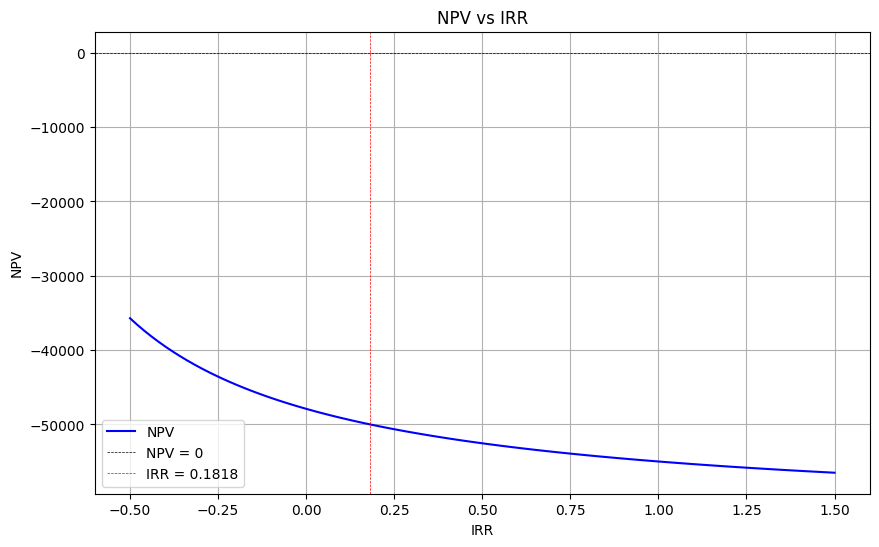

Сумма денежных потоков: 15000


In [4]:
# Определяем параметры
initial_sum =62900  # начальная сумма
CF = [
    1000, 3000, 4000, 7000
]
BasePeriodLength = 30  # базовый период в днях
n = len(CF)  # количество периодов

# Задаем диапазон и шаг
start_irr = 0
end_irr =100
step = 0.01


 # Находим интервалы
intervals = find_root_intervals(npv, start_irr, end_irr, step)

# Находим все корни
roots = find_all_roots(npv, intervals)

print("Найденные интервалы:", intervals)
print("Найденные корни:", roots)

if intervals:
    for interval in intervals:
        print(f"Интервал, в котором существует решение: {interval}")
        # Применяем метод бисекции для нахождения корня
        root = bisection_method(npv, interval[0], interval[1])
        print(f"Найденный корень (IRR): {root}")
else:
    print("Интервал не найден. Попробуйте расширить диапазон поиска или уменьшить шаг.")

# Генерируем значения IRR для визуализации
irr_values = np.linspace(-0.5, 1.5, 100)
npv_values = np.array([npv(irr) for irr in irr_values])

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(irr_values, npv_values, label='NPV', color='blue')
plt.axhline(0, color='black', lw=0.5, ls='--', label='NPV = 0')  # Горизонтальная линия NPV = 0

# Если корень найден, добавляем вертикальную линию для IRR
if interval:
    plt.axvline(root, color='red', lw=0.5, ls='--', label=f'IRR = {root:.4f}')

plt.title('NPV vs IRR')
plt.xlabel('IRR')
plt.ylabel('NPV')
plt.grid()
plt.legend()
plt.show()

# Сумма денежных потоков
SumSF = 0
for item in CF:
    SumSF += item

print(f"Сумма денежных потоков: {SumSF}")

Условия существования или отсутствия решения уравнения NPV(irr) = 0 зависят от структуры денежных потоков, начальной суммы инвестиций и корректности используемых коэффициентов. Одной из ключевых причин отсутствия решения является невозможность компенсации начальных затрат за счет будущих денежных потоков. Если сумма денежных потоков меньше начальной суммы инвестиций (или кредита), функция NPV(irr) всегда будет отрицательной (или положительной, в зависимости от знака потоков). Это означает, что уравнение NPV(irr) = 0 не имеет решения, так как функция не пересекает ось абсцисс.

Теоретическое обоснование.
Согласно теореме о промежуточном значении, если функция y = f(x) непрерывна на отрезке [a, b] и принимает на его концах значения разных знаков, то внутри отрезка существует хотя бы одна точка x = C, в которой f(C) = 0. Однако в случаях, когда сумма денежных потоков меньше начальных затрат, функция NPV(irr) не меняет знак на концах интервала. Это подтверждает, что решение уравнения NPV(irr) = 0 отсутствует.

Примеры.

Рассмотрим два примера:
1. Для счета с номером 1422 413 сумма кредита составляет 100 000,00 рублей, а общая сумма денежных потоков равна 98 098,71 рублей.
2. Для счета с номером 342/11-63-06 сумма кредита составляет 999 972,00 рублей, а общая сумма денежных потоков равна 850 449,65 рублей.

В обоих случаях сумма денежных потоков меньше суммы кредита, что свидетельствует о невозможности покрытия начальных затрат за счет будущих поступлений. Это приводит к тому, что функция NPV(irr) на концах интервала, где ищется решение, сохраняет один и тот же знак. Следовательно, уравнение NPV(irr) = 0 не имеет решения.

Вывод.
Таким образом, если будущие денежные потоки недостаточны для компенсации начальной суммы, функция NPV(irr) не пересекает ось абсцисс, и внутренний корень уравнения отсутствует. Это подчеркивает важность анализа структуры и объема денежных потоков при оценке финансовой эффективности проектов или инвестиций.
